# Sign Language Recognition - Model Training

This notebook covers the steps to create, train, and save the sign language recognition model using the preprocessed dataset. The model will be used to predict sign language gestures based on hand images.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Load the preprocessed data from the previous steps. These are the images and labels (signs) that have been prepared for model training.


In [2]:
data = np.load('preprocessed_data.npz')
X_train, X_val, X_test = data['X_train'], data['X_val'], data['X_test']
y_train, y_val, y_test = data['y_train'], data['y_val'], data['y_test']

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (20232, 50, 50)
Validation data shape: (2529, 50, 50)
Test data shape: (2530, 50, 50)


### Define a Convolutional Neural Network (CNN) model architecture. CNNs are well-suited for image classification tasks like recognizing hand gestures.


In [3]:
NUM_CLASSES = y_train.shape[1]  # Number of classes for the output (36 for A-Z and 0-9)

model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Add dropout to prevent overfitting
model.add(Dropout(0.5))

# Output layer with softmax activation (for multiclass classification)
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


/Users/salaheddine/PycharmProjects/Sign_laguage_project/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 359,588 (1.37 MB)

 Trainable params: 359,588 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

### Train the CNN model using the preprocessed data. The model will learn to recognize different sign language gestures.


In [4]:
history = model.fit(
    X_train.reshape(-1, 50, 50, 1),  # Reshape the data to fit the CNN input
    y_train,
    validation_data=(X_val.reshape(-1, 50, 50, 1), y_val),  # Reshape validation data
    epochs=10,
    batch_size=32,
    shuffle=True
)

Epoch 1/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.2619 - loss: 2.5349 - val_accuracy: 0.8347 - val_loss: 0.5372
Epoch 2/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.7086 - loss: 0.7869 - val_accuracy: 0.8960 - val_loss: 0.2795
Epoch 3/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.7866 - loss: 0.5465 - val_accuracy: 0.9091 - val_loss: 0.2258
Epoch 4/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8280 - loss: 0.4354 - val_accuracy: 0.9268 - val_loss: 0.1850
Epoch 5/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8526 - loss: 0.3735 - val_accuracy: 0.9407 - val_loss: 0.1436
Epoch 6/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8705 - loss: 0.3236 - val_accuracy: 0.9474 - val_loss: 0.1238
Epoch 7/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8862 - loss: 0.2791 - val_accuracy: 0.9565 - val_loss: 0.1075
Epoch 8/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.8961 - loss: 0.2510 - 

### Plot the training and validation accuracy and loss to visualize the model's performance over time.

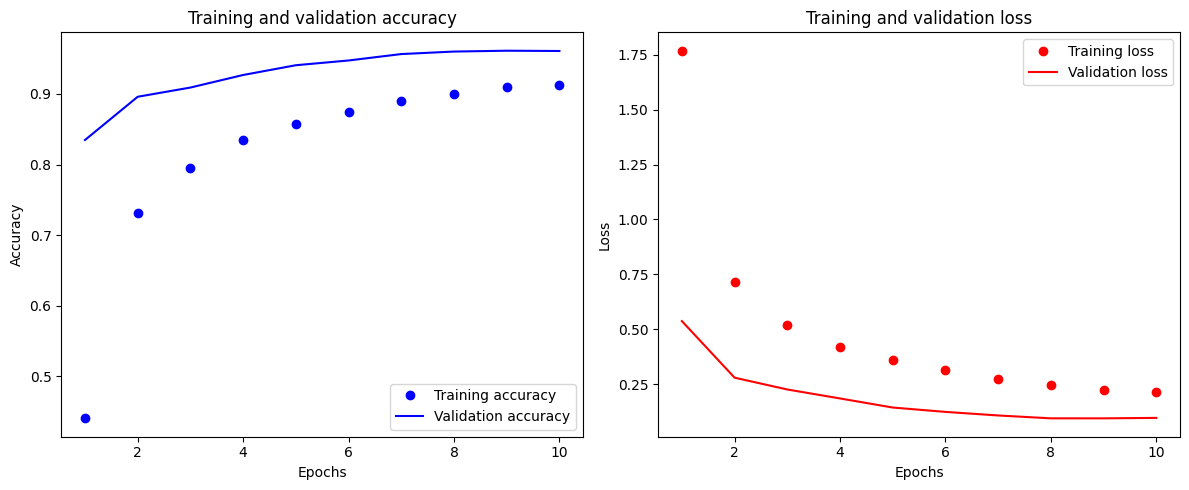

In [5]:
# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Evaluate the model on the test data to see how well it generalizes to unseen data.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 50, 50, 1), y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

### Save the trained model to a file. This model can be loaded later for predictions.

In [ ]:
model.save('sign_language_recognizer_model.h5')
print("Model saved successfully as sign_language_recognizer_model.h5")